<a href="https://www.kaggle.com/code/alamintokdershoukhin/brain-tumor-classification-using-hybrid-cnn?scriptVersionId=168105631" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/figshare-brain-tumor-dataset/dataset/README.txt
/kaggle/input/figshare-brain-tumor-dataset/dataset/cvind.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/2912.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/2011.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/3027.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/1912.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/3023.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/101.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/1194.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/851.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/2106.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/1850.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/2911.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/1731.mat
/kaggle/input/figshare-brain-tumor-dataset/dataset/data/1014.mat
/kaggle/input/figshare-brain-tumor

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found GPU at: /device:GPU:0


In [3]:
import os
import numpy
import matplotlib.pyplot as plt
import h5py
import cv2
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.losses import binary_crossentropy
from keras import backend as K
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import  BatchNormalization
import numpy as np
tf.keras.backend.clear_session()

In [4]:
!gdown --id  1IfYSdF3jR9CKQb39Opo-khTCTBHekQvB
!unzip BRAIN_DATA-20230730T201920Z-001.zip

/bin/bash: line 1: gdown: command not found
unzip:  cannot find or open BRAIN_DATA-20230730T201920Z-001.zip, BRAIN_DATA-20230730T201920Z-001.zip.zip or BRAIN_DATA-20230730T201920Z-001.zip.ZIP.


In [5]:
!pip install imbalanced-learn

In [6]:
# Take All the data into a list
data_dir= '/kaggle/input/figshare-brain-tumor-dataset/dataset/data'
total_image=3064
datalist=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  datalist.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [7]:
labels=[]


for i  in range(total_image):
  lb=int(datalist[i]["cjdata"]["label"][()])-1

  labels.append(lb)

labels=np.array(labels)
print(labels.shape)

(3064,)


[ 708 1426  930]


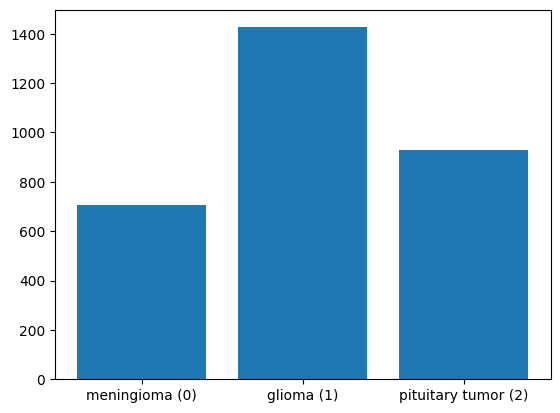

In [8]:
integer_to_class = {'0': 'meningioma (0)', '1': 'glioma (1)', '2': 'pituitary tumor (2)'}
classes, counts = np.unique(labels,return_counts=True)
plt.bar(classes,counts,tick_label=list(integer_to_class.values()))
print(counts)

In [9]:
total_image=3064

In [10]:
masks = []
for i in range(total_image):
  mask = datalist[i]["cjdata"]["tumorMask"][()]
  mask = np.expand_dims(resize(mask, (128, 128), mode="constant", preserve_range=True), axis=-1)
  masks.append(mask)

print(len(masks))

3064


In [11]:
masks=np.array(masks)
print(masks.shape)

(3064, 128, 128, 1)


In [12]:
images = []
for i in range(total_image):
  im = datalist[i]["cjdata"]["image"][()]
  im = np.expand_dims(resize(im, (128, 128), mode="constant", preserve_range=True), axis=-1)
  images.append(im)

print(len(images))

3064


In [13]:
images=np.array(images)
print(images.shape)

(3064, 128, 128, 1)


Text(0.5, 1.0, 'Mask')

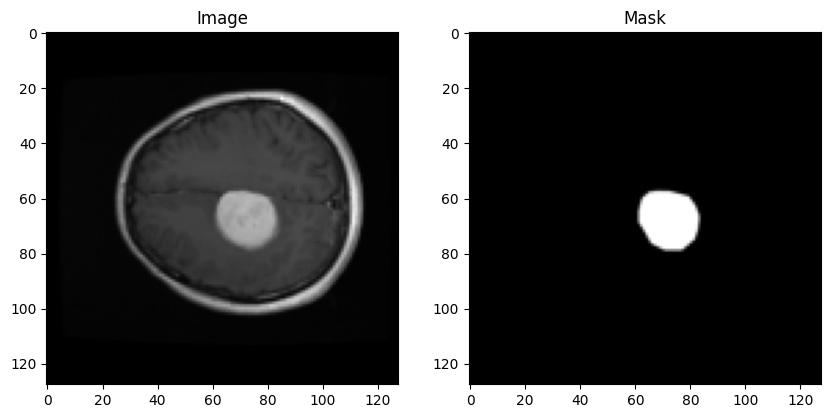

In [14]:
fig, arr = plt.subplots(1,2,figsize=(10, 10))
arr[0].imshow(images[10],cmap='gray')
arr[0].set_title('Image')
arr[1].imshow(masks[10],cmap='gray')
arr[1].set_title('Mask')

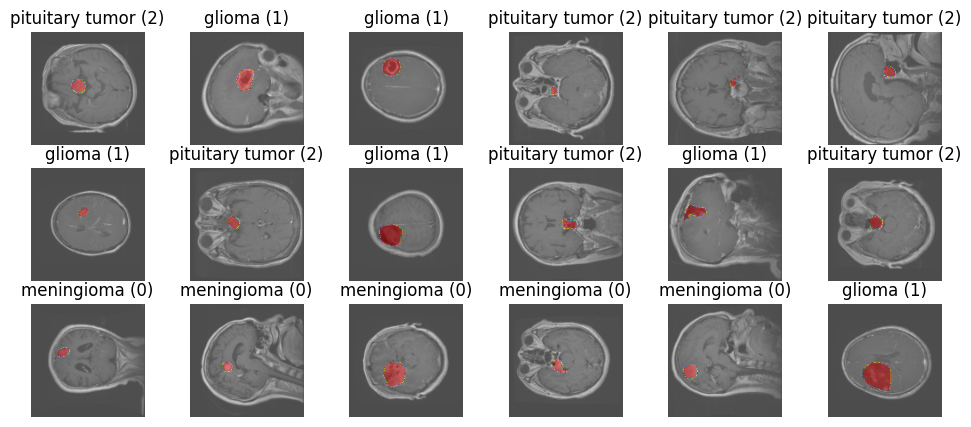

In [15]:
plt.figure(figsize=(12, 5))
for i, idx in enumerate(np.random.randint(3064, size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow( images[idx], cmap='gray')
    plt.imshow( np.ones_like(masks[idx])-masks[idx], alpha=0.5, cmap='Set1')
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

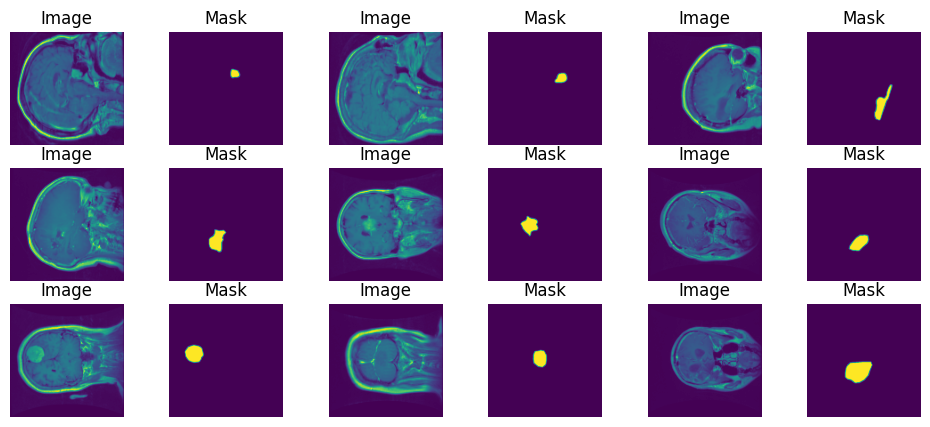

In [16]:
plt.figure(figsize=(12, 5))
i=1
for idx in np.random.randint(3064, size=9):
  plt.subplot(3,6,i);i+=1
  plt.imshow( images[idx])
  plt.title("Image")
  plt.axis('off')
  plt.subplot(3,6,i);i+=1
  plt.imshow( masks[idx])
  plt.title("Mask")
  plt.axis('off')

In [17]:
input_shape = images[0].shape # input shape
input_shape

(128, 128, 1)

In [18]:
x_train, x_test, y_train, y_test= train_test_split (images,masks,test_size=0.5, shuffle= True)
x_train.shape

(1532, 128, 128, 1)

In [19]:
# print("Shape of y_train:", y_train.shape)
# print("Data type of y_train:", y_train.dtype)
# print("Unique values in y_train:", np.unique(y_train))
y_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming 'images' is your numpy array of images and 'labels' is the corresponding labels
# Adjust the number of samples you want for each class
desired_samples = 1400  # for example, match the majority class

# Separating the images based on classes
images_class_0 = images[labels == 0]
images_class_1 = images[labels == 1]
images_class_2 = images[labels == 2]

# Function to augment images of a given class
# Function to augment images of a given class
def augment_images(image_class, num_samples):
    augmented_images = []
    count = 0
    while count < num_samples:
        for x in datagen.flow(image_class, batch_size=1):
            augmented_images.append(x[0])  # x is the batch of images
            count += 1
            if count == num_samples:
                break
    return np.array(augmented_images)


# Augment images for minority classes
augmented_class_0 = augment_images(images_class_0, desired_samples - len(images_class_0))
augmented_class_2 = augment_images(images_class_2, desired_samples - len(images_class_2))

# Combine original and augmented images and their labels
balanced_images = np.concatenate((images_class_0, augmented_class_0, images_class_1, images_class_2, augmented_class_2))
balanced_labels = np.array([0]*desired_samples + [1]*len(images_class_1) + [2]*desired_samples)




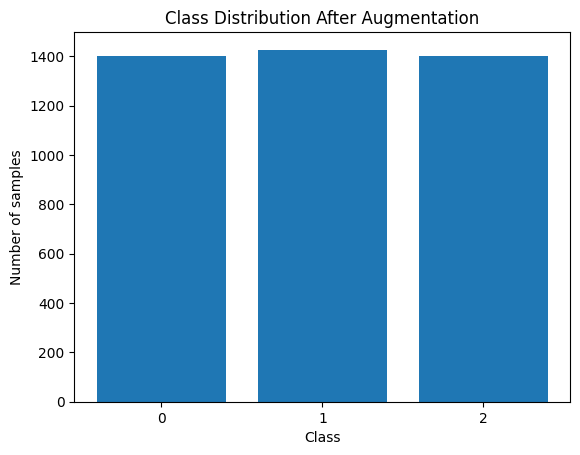

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the balanced_labels
unique, counts = np.unique(balanced_labels, return_counts=True)
class_counts = dict(zip(unique, counts))

# Create a bar chart
plt.bar(class_counts.keys(), class_counts.values())

# Adding labels and title for clarity
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution After Augmentation')
plt.xticks(list(class_counts.keys()))  # Ensure that each class label is shown

# Display the plot
plt.show()


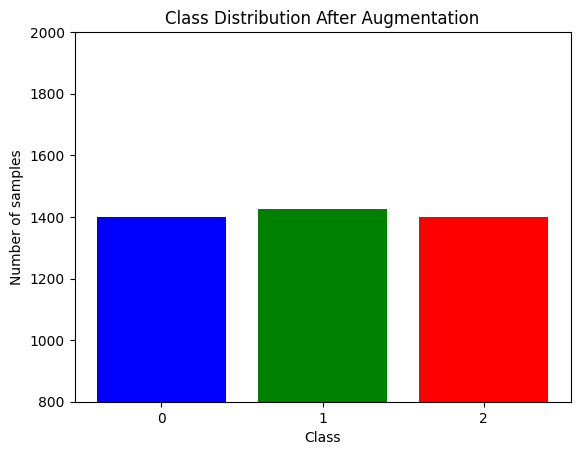

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined balanced_labels and class_counts

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if you have more classes

# Create a bar chart with specified colors
plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding labels and title for clarity
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution After Augmentation')
plt.xticks(list(class_counts.keys()))  # Ensure that each class label is shown

# Set y-axis range from 800 to 1400
plt.ylim(800, 2000)

# Display the plot
plt.show()


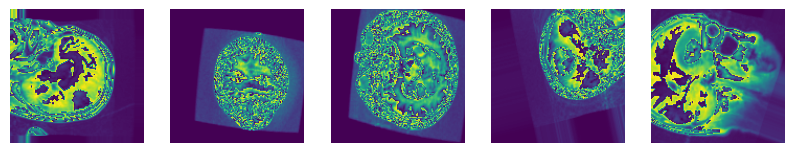

In [23]:
import matplotlib.pyplot as plt

def show_augmented_images(augmented_images, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_images[i].astype('uint8'))
        plt.axis('off')
    plt.show()

# For example, display 5 augmented images from class 0
show_augmented_images(augmented_class_0, 5)


In [24]:
# Combining images and labels into a single list of tuples
datalist = list(zip(balanced_images, balanced_labels))


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
# Let's use 80% of the data for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(balanced_images, balanced_labels, test_size=0.3, random_state=42)

# Now, X_train and y_train are your training data
# X_val and y_val are your validation data


In [26]:
print(X_train.shape)

(2958, 128, 128, 1)


In [27]:
import os
import h5py

# Assuming you have already run the loop to create datalist
data_dir = '/kaggle/input/figshare-brain-tumor-dataset/dataset/data'
total_image = 3064
datalist = []

for i in range(1, total_image + 1):
    filename = str(i) + ".mat"
    data = h5py.File(os.path.join(data_dir, filename), "r")
    datalist.append(data)
    print(data)

# Get the data directory of the first file in datalist
first_file_path = os.path.join(data_dir, "1.mat")
data_directory = os.path.dirname(first_file_path)

print("Data Directory:", data_directory)


<HDF5 file "1.mat" (mode r)>
<HDF5 file "2.mat" (mode r)>
<HDF5 file "3.mat" (mode r)>
<HDF5 file "4.mat" (mode r)>
<HDF5 file "5.mat" (mode r)>
<HDF5 file "6.mat" (mode r)>
<HDF5 file "7.mat" (mode r)>
<HDF5 file "8.mat" (mode r)>
<HDF5 file "9.mat" (mode r)>
<HDF5 file "10.mat" (mode r)>
<HDF5 file "11.mat" (mode r)>
<HDF5 file "12.mat" (mode r)>
<HDF5 file "13.mat" (mode r)>
<HDF5 file "14.mat" (mode r)>
<HDF5 file "15.mat" (mode r)>
<HDF5 file "16.mat" (mode r)>
<HDF5 file "17.mat" (mode r)>
<HDF5 file "18.mat" (mode r)>
<HDF5 file "19.mat" (mode r)>
<HDF5 file "20.mat" (mode r)>
<HDF5 file "21.mat" (mode r)>
<HDF5 file "22.mat" (mode r)>
<HDF5 file "23.mat" (mode r)>
<HDF5 file "24.mat" (mode r)>
<HDF5 file "25.mat" (mode r)>
<HDF5 file "26.mat" (mode r)>
<HDF5 file "27.mat" (mode r)>
<HDF5 file "28.mat" (mode r)>
<HDF5 file "29.mat" (mode r)>
<HDF5 file "30.mat" (mode r)>
<HDF5 file "31.mat" (mode r)>
<HDF5 file "32.mat" (mode r)>
<HDF5 file "33.mat" (mode r)>
<HDF5 file "34.mat"

In [28]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.utils import to_categorical

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Building a basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_categorical, epochs=20, validation_data=(X_val, y_val_categorical))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val_categorical)
print(f"Validation Accuracy: {val_accuracy}")


Epoch 1/20
106/106 [==============================] - 7s 22ms/step - loss: 23.1004 - accuracy: 0.6358 - val_loss: 0.7085 - val_accuracy: 0.7104
Epoch 2/20
106/106 [==============================] - 1s 14ms/step - loss: 0.5622 - accuracy: 0.7740 - val_loss: 0.5808 - val_accuracy: 0.7530
Epoch 3/20
106/106 [==============================] - 1s 14ms/step - loss: 0.4025 - accuracy: 0.8370 - val_loss: 0.6073 - val_accuracy: 0.7494
Epoch 4/20
106/106 [==============================] - 1s 14ms/step - loss: 0.3435 - accuracy: 0.8757 - val_loss: 0.5416 - val_accuracy: 0.7790
Epoch 5/20
106/106 [==============================] - 1s 14ms/step - loss: 0.2591 - accuracy: 0.9056 - val_loss: 0.5837 - val_accuracy: 0.7920
Epoch 6/20
106/106 [==============================] - 1s 14ms/step - loss: 0.2008 - accuracy: 0.9243 - val_loss: 0.5222 - val_accuracy: 0.8215
Epoch 7/20
106/106 [==============================] - 2s 14ms/step - loss: 0.1902 - accuracy: 0.9328 - val_loss: 0.5405 - val_accuracy: 0.836

In [29]:

import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

# Assuming balanced_images and balanced_labels are your data

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)






# Resize images to match VGG16 input shape
X_train_resized = np.array([resize(image, (224, 224, 3)) for image in X_train])
X_val_resized = np.array([resize(image, (224, 224, 3)) for image in X_val])

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Extract features using VGG16
X_train_features = base_model.predict(X_train_resized)
X_val_features = base_model.predict(X_val_resized)

# Flatten extracted features
X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)
X_val_flattened = X_val_features.reshape(X_val_features.shape[0], -1)

# Train a Random Forest classifier on the extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_flattened, y_train)

# Evaluate the Random Forest classifier
val_accuracy_rf = rf_classifier.score(X_val_flattened, y_val)
print(f"Validation Accuracy (Random Forest): {val_accuracy_rf}")



















# Convert labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Building a basic CNN model
top_model = Sequential([
    Flatten(input_shape=X_train_flattened.shape[1:]),
    Dense(128, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the top model
top_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the top model
top_model.fit(X_train_flattened, y_train_categorical, epochs=20, validation_data=(X_val_flattened, y_val_categorical))

# Evaluate the top model
val_loss, val_accuracy_nn = top_model.evaluate(X_val_flattened, y_val_categorical)
print(f"Validation Accuracy (Top Model): {val_accuracy_nn}")


27/27 [==============================] - 6s 214ms/step
Validation Accuracy (Random Forest): 0.8640661938534279
Epoch 1/20
106/106 [==============================] - 2s 8ms/step - loss: 27.1595 - accuracy: 0.7962 - val_loss: 19.1925 - val_accuracy: 0.7920
Epoch 2/20
106/106 [==============================] - 0s 5ms/step - loss: 2.8590 - accuracy: 0.9263 - val_loss: 4.6969 - val_accuracy: 0.8463
Epoch 3/20
106/106 [==============================] - 1s 5ms/step - loss: 1.0312 - accuracy: 0.9420 - val_loss: 2.7631 - val_accuracy: 0.8783
Epoch 4/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3734 - accuracy: 0.9639 - val_loss: 1.8335 - val_accuracy: 0.8889
Epoch 5/20
106/106 [==============================] - 1s 5ms/step - loss: 0.2179 - accuracy: 0.9695 - val_loss: 2.9779 - val_accuracy: 0.8960
Epoch 6/20
106/106 [==============================] - 0s 5ms/step - loss: 0.5708 - accuracy: 0.9669 - val_loss: 2.2433 - val_accuracy: 0.8842
Epoch 7/20
106/106 [===============

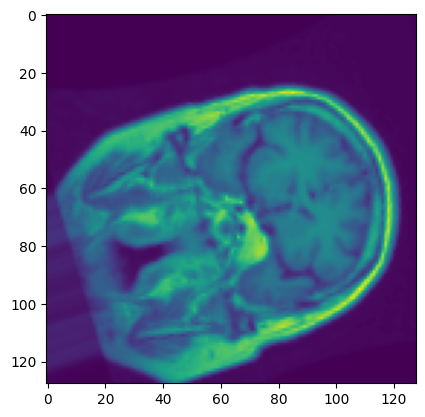

In [30]:
plt.imshow(X_train[2])